In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns




In [13]:
df = pd.read_csv(r"D:\speech_emotion\speech-emotion-classification\features\ravdess_features.csv")
df.head()


,file,emotion,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,...,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,centroid,zcr,rolloff
0,D:\speech_emotion\speech-emotion-classificatio...,neutral,-726.217224,68.541420,3.293398,12.205300,5.510278,13.667410,-2.983828,3.098029,...,0.617627,0.630300,0.641174,0.643986,0.623945,0.633900,0.629672,7416.297748,0.050476,13285.735887
1,D:\speech_emotion\speech-emotion-classificatio...,neutral,-719.128296,70.201569,1.168397,13.122541,7.836950,14.411290,-4.111360,4.468973,...,0.629304,0.598250,0.602427,0.638104,0.650110,0.663277,0.638956,7135.571471,0.052904,13191.643371
2,D:\speech_emotion\speech-emotion-classificatio...,neutral,-714.995728,69.689346,3.924564,11.924190,6.421723,11.011614,-2.878103,4.509558,...,0.595411,0.606914,0.611433,0.634772,0.586808,0.578905,0.612411,7239.265648,0.046627,13279.137826
3,D:\speech_emotion\speech-emotion-classificatio...,neutral,-710.975281,67.564880,5.782240,13.230727,6.190846,12.628252,-1.675169,5.657494,...,0.646860,0.619975,0.611885,0.633945,0.597960,0.602110,0.619935,7008.958169,0.053835,13272.074245
4,D:\speech_emotion\speech-emotion-classificatio...,calm,-759.921753,75.783524,6.023605,14.557394,6.454188,14.631508,-3.004551,4.620970,...,0.620046,0.594329,0.596532,0.616511,0.638365,0.670592,0.602803,6997.311810,0.045929,12649.543486


In [14]:
X = df.drop(["file", "emotion"], axis=1)
y = df["emotion"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "kNN": KNeighborsClassifier(n_neighbors=7),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "SVM": SVC(kernel="rbf", C=10)
}

results = {}


In [16]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))



=== Logistic Regression ===
Accuracy: 0.5625
              precision    recall  f1-score   support

       angry       0.71      0.79      0.75        76
        calm       0.58      0.64      0.60        77
     disgust       0.60      0.45      0.52        77
        fear       0.64      0.56      0.60        77
       happy       0.52      0.51      0.51        77
     neutral       0.59      0.45      0.51        38
         sad       0.43      0.45      0.44        77
    surprise       0.48      0.60      0.53        77

    accuracy                           0.56       576
   macro avg       0.57      0.56      0.56       576
weighted avg       0.57      0.56      0.56       576


=== kNN ===
Accuracy: 0.6857638888888888
              precision    recall  f1-score   support

       angry       0.68      0.72      0.70        76
        calm       0.68      0.82      0.75        77
     disgust       0.71      0.71      0.71        77
        fear       0.64      0.55      0.59 

In [17]:
import pandas as pd
pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])



,Accuracy
Logistic Regression,0.562500
kNN,0.685764
Random Forest,0.927083
SVM,0.939236


In [ ]:
best_model=models["SVM"]   

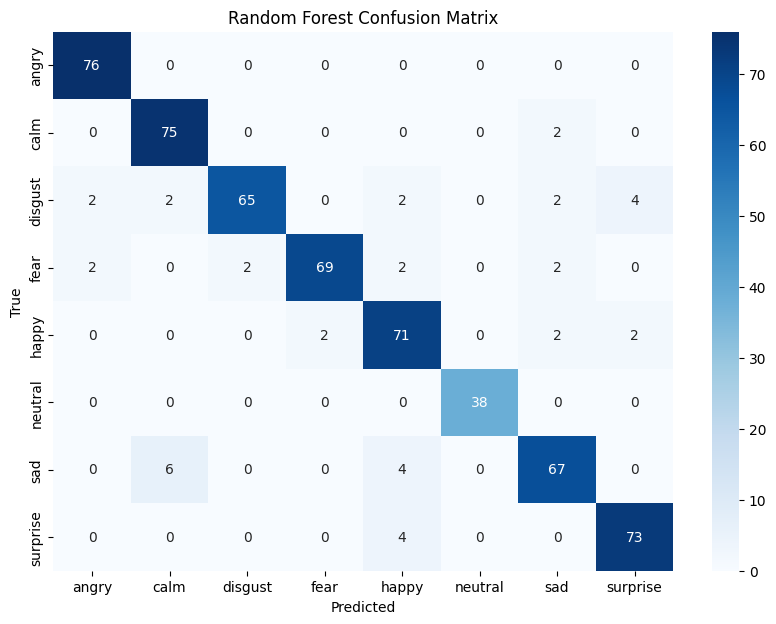

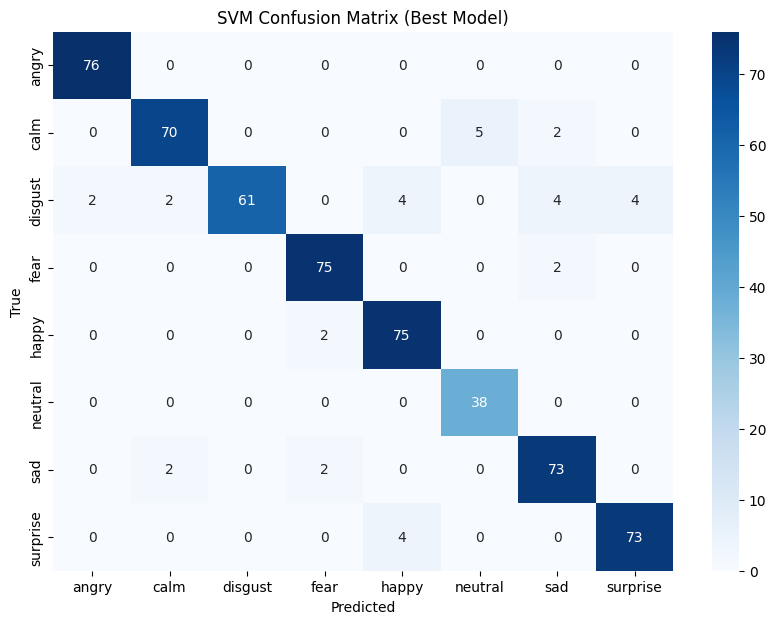

In [18]:
def plot_confusion(model, title):
    from sklearn.metrics import confusion_matrix
    import numpy as np

    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=model.classes_,
                yticklabels=model.classes_)
    plt.title(title)
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.show()
plot_confusion(models["Random Forest"], "Random Forest Confusion Matrix")
plot_confusion(models["SVM"], "SVM Confusion Matrix (Best Model)")



In [19]:
import joblib

joblib.dump(models["Random Forest"], 
            r"D:\speech_emotion\speech-emotion-classification\models\random_forest_ravdess.pkl")

joblib.dump(models["SVM"], 
            r"D:\speech_emotion\speech-emotion-classification\models\svm_ravdess.pkl")

print("Models saved successfully!")
joblib.dump(scaler, 
            r"D:\speech_emotion\speech-emotion-classification\models\scaler.pkl")
best_model = max(results, key=results.get)
print("Best Model is:", best_model, "with accuracy", results[best_model])


Models saved successfully!
Best Model is: SVM with accuracy 0.9392361111111112


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

best_model = models["SVM"] 

y_pred = best_model.predict(X_test_scaled)

print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


Precision: 0.9382867391161976
Recall: 0.9431818181818181
F1 Score: 0.9384544904185435


In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())


Cross-validation scores: [1.         0.99826389 1.         0.99826389 1.        ]
Mean CV score: 0.9993055555555556
